# Hackathon Bonus Assignment: Network Analytics Package

### Example 3.6 Community Detection on Zachary’s Karate Club Data

This example uses Zachary’s Karate Club data (Zachary 1977), which describes social network friendships between 34 members of a karate club at a US university in the 1970s. This is one of the standard publicly available data tables for testing community detection algorithms. It contains 34 nodes and 78 edges. 

In [8]:
import sasviya.network as sasnet

In [9]:
# Create Graph
G = sasnet.karate_club_graph()

In [10]:
def run_community(G, res_level):
    outG = G.louvain(resolution=res_level)
    print(f'Communities (res={res_level})')
    for i, comm in enumerate(outG):
        print(f'comm {i+1}: {comm.nodes()}')

In [11]:
run_community(G, 1)

Communities (res=1)
comm 1: [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
comm 2: [4, 5, 6, 10, 16]
comm 3: [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
comm 4: [23, 24, 25, 27, 28, 31]


In [12]:
run_community(G, 0.5)

Communities (res=0.5)
comm 1: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]
comm 2: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


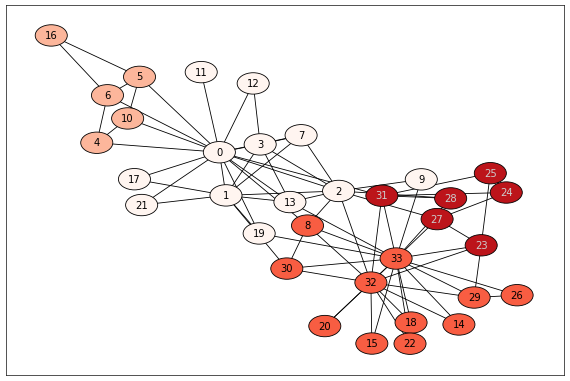

In [13]:
comm_dict = {node:i for i, comm in enumerate(G.louvain()) for node in comm.nodes()}
G.set_node_attributes(name='comm', values=comm_dict, inplace=True)

fig = sasnet.PlotGraph(G, layout='fdp', nodes_color_by_value='comm')
fig.show()